In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
# Load dataset
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df1 = df.copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Ada kolom yang tipe datanya tidak sesuai, sehingga akan diubah tipe datanya terlebih dahulu

In [ ]:
to_category = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement','JobLevel','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']
for x in to_category:
  df1[x] = df1[x].astype('str')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

##### Klasifikasi Umur

In [ ]:
df1['AgeClassification']=np.where(df1['Age'] > 54, 'Senior Age', np.where(df1['Age'] > 24, 'Prime Age', 'Entry Level Age'))
df1.tail(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeClassification
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8,Prime Age
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2,Prime Age


In [ ]:
df1 = df1.drop(['Age','EmployeeCount','EmployeeNumber','StandardHours','Over18'], axis=1)

df1.tail(2)

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeClassification
1468,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8,Prime Age
1469,No,Travel_Rarely,628,Research & Development,8,3,Medical,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,No,12,3,1,0,6,3,4,4,3,1,2,Prime Age


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   object
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   object
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   object
 11  JobLevel                  1470 non-null   object
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   object
 14  MaritalStatus           

# Handle the Missing Values

In [ ]:
df1.isna().sum()

Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
AgeClassification           0
dtype: int64

Tidak ada data yang bernilai kosong/missing value

# Duplicate

In [ ]:
df1.duplicated().sum()

0

Tidak ada data duplicate

In [ ]:
nums = df1.select_dtypes('number').columns.tolist()
cats = df1.select_dtypes('object').columns.tolist()

In [ ]:
df1[nums].sample()

,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1082,507,20,97,2272,24812,0,14,5,2,4,3,1,2


# Handle the Outliers

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')
filtered_entries = np.array([True] * len(df1))

for col in nums:
    zscore = abs(stats.zscore(df1[col]))
    a = (zscore<3) & filtered_entries
    df2 = df1[a]
    
print(f'Jumlah baris setelah memfilter outlier: {len(df2)}')

Jumlah baris sebelum memfilter outlier: 1470
Jumlah baris setelah memfilter outlier: 1456


In [ ]:
df2.sample(5)

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeClassification
0,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,Prime Age
339,No,Travel_Rarely,1130,Sales,8,4,Marketing,2,Female,56,3,2,Sales Executive,2,Married,6214,3415,1,No,18,3,1,1,8,3,3,8,7,0,7,Prime Age
704,No,Travel_Rarely,882,Sales,3,4,Life Sciences,4,Male,92,3,3,Sales Executive,4,Divorced,7823,6812,6,No,13,3,2,1,12,2,3,10,9,0,8,Prime Age
314,No,Travel_Rarely,117,Research & Development,10,1,Medical,3,Male,99,3,4,Manager,1,Married,17068,5355,1,Yes,14,3,4,0,21,3,3,21,9,11,10,Prime Age
1405,No,Non-Travel,697,Research & Development,10,3,Medical,3,Female,40,3,3,Research Director,3,Married,11031,26862,4,No,20,4,3,1,13,2,4,11,7,4,8,Prime Age


## Mapping Value

In [ ]:
df3=df2.copy()

In [ ]:
replacement_mapping_dict_edu = {
    '1': 'Below College',
    '2' : 'College',
    '3' : 'Bachelor',
    '4' : 'Master',
    '5' : 'Doctor'
}

replacement_mapping_dict_satisfaction = {
    '1': 'Low',
    '2' : 'Medium',
    '3' : 'High',
    '4' : 'Very High'
}

replacement_mapping_dict_performance = {
    '1': 'Low',
    '2' : 'Good',
    '3' : 'Excellent',
    '4' : 'Outstanding'
}

replacement_mapping_dict_worklife = {
    '1': 'Low',
    '2' : 'Good',
    '3' : 'Better',
    '4' : 'Best'
}

df3['Education'] = df3['Education'].replace(replacement_mapping_dict_edu)
df3['EnvironmentSatisfaction'] = df3['EnvironmentSatisfaction'].replace(replacement_mapping_dict_satisfaction)
df3['JobInvolvement'] = df3['JobInvolvement'].replace(replacement_mapping_dict_satisfaction)
df3['JobSatisfaction'] = df3['JobSatisfaction'].replace(replacement_mapping_dict_satisfaction)
df3['RelationshipSatisfaction'] = df3['RelationshipSatisfaction'].replace(replacement_mapping_dict_satisfaction)
df3['PerformanceRating'] = df3['PerformanceRating'].replace(replacement_mapping_dict_performance)
df3['WorkLifeBalance'] = df3['WorkLifeBalance'].replace(replacement_mapping_dict_worklife)

In [ ]:
df3.sample(5)

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeClassification
1049,No,Travel_Rarely,1358,Sales,16,Below College,Life Sciences,Very High,Male,96,High,2,Sales Executive,High,Married,5301,2939,8,No,15,Excellent,High,2,4,2,Good,2,1,2,2,Prime Age
662,Yes,Travel_Rarely,500,Sales,2,Bachelor,Medical,High,Female,49,Medium,1,Sales Representative,High,Single,2044,22052,1,No,13,Excellent,Very High,0,2,3,Good,2,2,0,2,Entry Level Age
255,No,Travel_Rarely,685,Research & Development,1,Bachelor,Life Sciences,Low,Female,62,High,2,Manufacturing Director,High,Married,4898,7505,0,No,12,Excellent,Very High,2,5,3,Better,4,2,1,2,Prime Age
1218,No,Travel_Rarely,918,Sales,6,Bachelor,Marketing,Very High,Male,35,High,3,Sales Executive,High,Single,9241,15869,1,No,12,Excellent,Medium,0,10,3,Better,10,8,8,7,Prime Age
987,No,Travel_Frequently,541,Sales,2,Bachelor,Marketing,Medium,Male,52,High,3,Sales Executive,Medium,Married,10596,15395,2,No,11,Excellent,Medium,0,14,5,Better,4,2,3,2,Prime Age


# Feature Encoding

In [ ]:
#Categorical variables cannot be handled without encoding. The solution is the feature encoding.

df4 = pd.get_dummies(df3).reset_index()
df4

,index,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Bachelor,Education_Below College,Education_College,Education_Doctor,Education_Master,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_High,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very High,Gender_Female,Gender_Male,JobInvolvement_High,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very High,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_High,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,PerformanceRating_Excellent,PerformanceRating_Outstanding,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good,WorkLifeBalance_Low,AgeClassification_Entry Level Age,AgeClassification_Prime Age,AgeClassification_Senior Age
0,0,1102,1,94,5993,19479,8,11,8,0,6,4,0,5,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,279,8,61,5130,24907,1,23,10,3,10,7,1,7,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
2,2,1373,2,92,2090,2396,6,15,7,3,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
3,3,1392,3,56,2909,23159,1,11,8,3,8,7,3,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,4,591,2,40,3468,16632,9,12,6,3,2,2,2,2,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1465,884,23,41,2571,12290,4,17,17,3,5,2,0,3,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1452,1466,613,6,42,9991,21457,4,15,9,5,7,7,1,7,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1453,1467,155,4,87,6142,5174,1,20,6,0,6,2,0,3,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1454,1468,1023,2,63,5390,13243,2,14,17,3,9,6,0,8,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0


In [ ]:
df4 = df4.drop(['Attrition_No','OverTime_No','Gender_Female'],axis=1)
df4 = df4.rename(columns = {'Attrition_Yes' : 'Attrition', 'OverTime_Yes' : 'OverTime'})
df4.head(2)

,index,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Bachelor,Education_Below College,Education_College,Education_Doctor,Education_Master,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_High,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very High,Gender_Male,JobInvolvement_High,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very High,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_High,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime,PerformanceRating_Excellent,PerformanceRating_Outstanding,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good,WorkLifeBalance_Low,AgeClassification_Entry Level Age,AgeClassification_Prime Age,AgeClassification_Senior Age
0,0,1102,1,94,5993,19479,8,11,8,0,6,4,0,5,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0
1,1,279,8,61,5130,24907,1,23,10,3,10,7,1,7,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 80 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   index                               1456 non-null   int64
 1   DailyRate                           1456 non-null   int64
 2   DistanceFromHome                    1456 non-null   int64
 3   HourlyRate                          1456 non-null   int64
 4   MonthlyIncome                       1456 non-null   int64
 5   MonthlyRate                         1456 non-null   int64
 6   NumCompaniesWorked                  1456 non-null   int64
 7   PercentSalaryHike                   1456 non-null   int64
 8   TotalWorkingYears                   1456 non-null   int64
 9   TrainingTimesLastYear               1456 non-null   int64
 10  YearsAtCompany                      1456 non-null   int64
 11  YearsInCurrentRole                  1456 non-null   int64
 12  YearsS

In [ ]:
from sklearn.preprocessing import StandardScaler

df5 = df4
# Removing Categorical Features before the feature scaling
columns = df4.columns

# Continous col
columns_cont = np.delete(columns,np.s_[13:])

# Categorical col
columns_categorical = np.delete(columns,np.s_[0:13])

# except age since it is discretized and attrition and overtime
#except_age_cont = np.delete(columns_cont, [0])

# Applying Standardization 
# Init StandardScaler
scaler = StandardScaler()

#Transformation of training dataset features
Except = pd.DataFrame(df5, columns = columns_cont)
scaler.fit(Except)

df5 = pd.DataFrame(scaler.transform(Except), columns = columns_cont).join(df4[columns_categorical])

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 80 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   index                               1456 non-null   float64
 1   DailyRate                           1456 non-null   float64
 2   DistanceFromHome                    1456 non-null   float64
 3   HourlyRate                          1456 non-null   float64
 4   MonthlyIncome                       1456 non-null   float64
 5   MonthlyRate                         1456 non-null   float64
 6   NumCompaniesWorked                  1456 non-null   float64
 7   PercentSalaryHike                   1456 non-null   float64
 8   TotalWorkingYears                   1456 non-null   float64
 9   TrainingTimesLastYear               1456 non-null   float64
 10  YearsAtCompany                      1456 non-null   float64
 11  YearsInCurrentRole                  1456 no

## Split Train/Test --> Over/under/SMOTE --> Modelling

In [ ]:

# Splitting the data into Train and Test
X = df5.drop(columns=['Attrition'])
y = df5['Attrition'] #target / label

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Balancing dengan Over/under/SMOTE
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(1).fit_resample(X_train, y_train)
X_over, y_over = over_sampling.RandomOverSampler(1).fit_resample(X_train, y_train)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1).fit_resample(X_train, y_train)

print('Original')
print(pd.Series(y_train).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    858
1    161
Name: Attrition, dtype: int64


UNDERSAMPLING
0    161
1    161
Name: Attrition, dtype: int64


OVERSAMPLING
0    858
1    858
Name: Attrition, dtype: int64


SMOTE
0    858
1    858
Name: Attrition, dtype: int64


In [ ]:
# Splitting the data into Train and Test
X = df5.drop(columns=['Attrition'])
y = df5['Attrition'] #target / label

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)



In [ ]:
# Splitting the data into Train and Test
X = df5.drop(columns=['Attrition'])
y = df5['Attrition'] #target / label

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Balancing dengan Over/under/SMOTE
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(1).fit_resample(X_train, y_train)
X_over, y_over = over_sampling.RandomOverSampler(1).fit_resample(X_train, y_train)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(1).fit_resample(X_train, y_train)

print('Original')
print(pd.Series(y_train).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    858
1    161
Name: Attrition, dtype: int64


UNDERSAMPLING
0    161
1    161
Name: Attrition, dtype: int64


OVERSAMPLING
0    858
1    858
Name: Attrition, dtype: int64


SMOTE
0    858
1    858
Name: Attrition, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
   #print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    #print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    #print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    #print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
#     print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))
#     print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))


#def eval_classification(model, xtrain, ytrain, xtest, ytest):
 #   ypred = model.predict(xtest)
 #   print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
 #   print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
  #  print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
   # print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
   # y_pred_proba = model.predict_proba(xtest)
    #print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(lr, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.68
Recall (Test Set): 0.45
F1-Score (Test Set): 0.54
AUC (test-proba): 0.87
AUC (train-proba): 0.98


Logit Hyperparams (RandomizedSearchCV, GridSearchCV)

In [ ]:
# tune hyperparam
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

penalty = ['l2', 'l1', 'elasticnet']
C = np.logspace(-5,5,20)#[0.0001, 0.001, 0.002, 0.01, 0.02, 0.03]
solver = ['newton-cg', 'sag', 'saga']
hyperparams = dict(penalty=penalty, C=C, solver=solver)

# Inisiasi model (rs)
lr = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
rs = RandomizedSearchCV(lr, hyperparams, cv=5, scoring='roc_auc')

# Fitting Model & Evaluation
rs.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(rs, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.86
Precision (Test Set): 0.65
Recall (Test Set): 0.45
F1-Score (Test Set): 0.53
AUC (test-proba): 0.87
AUC (train-proba): 0.98


In [ ]:
show_best_hyperparameter(rs)

{'C': 69.51927961775606, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
# Inisiasi model (gs)
lr = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
gs = GridSearchCV(lr, hyperparams, cv=5, scoring='roc_auc')

# Fitting Model & Evaluation
gs.fit(X_over_SMOTE, y_over_SMOTE)
eval_classification(gs, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.87
Precision (Test Set): 0.69
Recall (Test Set): 0.43
F1-Score (Test Set): 0.53
AUC (test-proba): 0.87
AUC (train-proba): 0.98


In [ ]:
show_best_hyperparameter(gs)

{'C': 0.5455594781168515, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': 42, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Latih Model
dt_SMOTE = DecisionTreeClassifier(random_state=42)
dt_SMOTE.fit(X_over_SMOTE,y_over_SMOTE)

# Prediksi dan evaluasi
y_pred = dt_SMOTE.predict(X_test)
eval_classification(dt_SMOTE, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.33
Recall (Test Set): 0.38
F1-Score (Test Set): 0.35
AUC (test-proba): 0.61
AUC (train-proba): 1.00


In [ ]:
# Hyperparameters tuning dengan pendekatan RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, num=30)] # Maximum number of levels in tree
min_samples_split = [int(x) for x in np.linspace(1,40, num=40)] # Minimum number of samples required to split a node
min_samples_leaf = [int(x) for x in np.linspace(1,20, num=20)] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt','log2', None] # Number of features to consider at every split

hyperparameters = dict(criterion = criterion,
                       max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
dt_random = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
dt_random.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
y_pred = dt_random.predict(X_test)#Check performa dari model
eval_classification(dt_random, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.74
Precision (Test Set): 0.30
Recall (Test Set): 0.34
F1-Score (Test Set): 0.32
AUC (test-proba): 0.65
AUC (train-proba): 0.97


In [ ]:
dt_random.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 52,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 12,
 'min_samples_split': 28,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
#Hyperparameters tuning dengan pendekatan GridSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
criterion = ['gini', 'entropy']
max_depth = [2,3,5] # Maximum number of levels in tree
min_samples_split = [2,3,5] # Minimum number of samples required to split a node
min_samples_leaf = [2,4,10] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt','log2', None] # Number of features to consider at every split

hyperparameters = dict(criterion = criterion,
                       max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt, hyperparameters, cv=5, scoring='roc_auc')
dt_grid.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
y_pred = dt_grid.predict(X_test)#Check performa dari model
eval_classification(dt_grid, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.24
Recall (Test Set): 0.41
F1-Score (Test Set): 0.31
AUC (test-proba): 0.66
AUC (train-proba): 0.92


In [ ]:
dt_grid.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 20,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

# XGBoost

In [ ]:
from xgboost import XGBClassifier, XGBRegressor

xg = XGBClassifier(random_state=42)
xg.fit(X_SMOTE, y_SMOTE)

eval_classification(xg, X_SMOTE, y_SMOTE, X_test, y_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(0, 1, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist', 'gpu_hist'],
                    'subsample' : [float(x) for x in np.linspace(0, 0.4, num = 11)],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0.1, 0.2, num = 11)],

                    'lambda' : [float(x) for x in np.linspace(0.9, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
xg_tuned.fit(X_SMOTE,y_SMOTE)

# Predict & Evaluation
eval_classification(xg_tuned, X_SMOTE, y_SMOTE, X_test, y_test)

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train, eval_metric=['error','auc','logloss'], eval_set=[(X_train, y_train),(X_test, y_test)], verbose=1)

eval_classification(xg, X_train, y_train, X_test, y_test)

In [ ]:
from matplotlib import pyplot

# retrieve performance metrics
results = xg.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
fig.savefig('logloss.png')
# plot classification Error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()
fig.savefig('classerror.png')
# plot classification AUC
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
pyplot.ylabel('Classification AUC')
pyplot.title('XGBoost Classification AUC')
pyplot.show()
fig.savefig('auc.png')

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train, eval_metric=['logloss','auc'], eval_set=[(X_train, y_train),(X_test, y_test)], verbose=0, early_stopping_rounds=1)

eval_classification(xg, X_train, y_train, X_test, y_test)

# CatBoost

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, f1_score, precision_score, recall_score

# model train

model = CatBoostClassifier()
model.fit(X_test, y_test, verbose=0)
eval_classification(model, X_over_SMOTE, y_over_SMOTE, X_test, y_test)


In [ ]:
# model tuned randomized
model_tun = CatBoostClassifier()
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}
model_tun.randomized_search(grid, X=X, y=y)
clear_output()
eval_classification(model_tun, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

In [ ]:
# model  tuned gridsearchcv



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Latih model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_over_SMOTE, y_over_SMOTE)

# Prediksi & evaluasi
y_pred = rf_clf.predict(X_test)
eval_classification(rf_clf,X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.61
Recall (Test Set): 0.25
F1-Score (Test Set): 0.36
AUC (test-proba): 0.80
AUC (train-proba): 1.00


### Hyperparameter Tuning RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, num=50)] # Maximum number of levels in tree
min_samples_split = [int(x) for x in np.linspace(1,40, num=40)] # Minimum number of samples required to split a node
min_samples_leaf = [int(x) for x in np.linspace(1,20, num=20)] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt','log2', None] # Number of features to consider at every split

hyperparameters = dict(criterion = criterion,
                       max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
rf = RandomForestClassifier(random_state=42)
model_rf = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
model_rf.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
y_pred = model_rf.predict(X_test)#Check performa dari model
eval_classification(model_rf,X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.84
Precision (Test Set): 0.58
Recall (Test Set): 0.37
F1-Score (Test Set): 0.45
AUC (test-proba): 0.82
AUC (train-proba): 1.00


In [ ]:
model_rf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 56,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 8,
 'min_samples_split': 19,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Hyperparameter Tuning 

- Menggunakan pendekatan RandomizedSearchCV
- Cross-Validation 5 kali lipat
- Didapatkan hasil dengan parameter terbaik :  criterion': 'gini', 'max_depth': 93, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 19}
- Bias-Variance Tradeoff pada model Random Forest masih overfit


Text(0.5, 1.0, 'feature importance score')

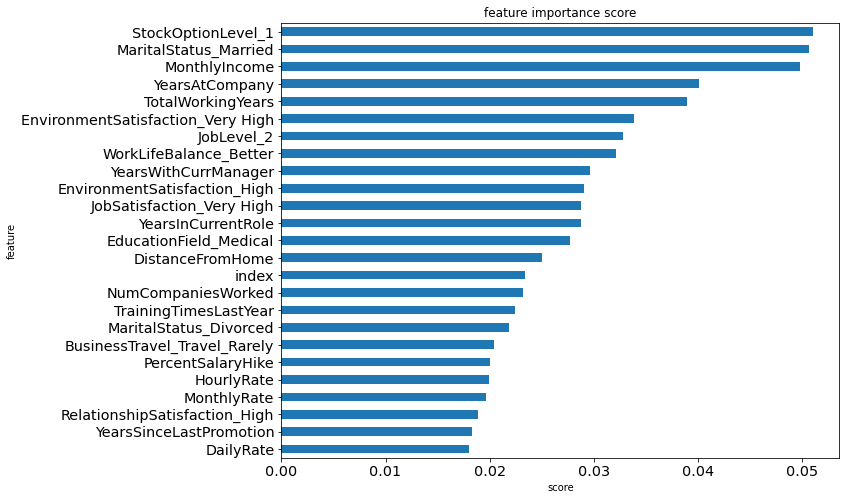

In [ ]:
# Feature Importance With Random Forest Model
feat_importances = pd.Series(model_rf.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

### Hyperparameter Tuning GridSearchCV

In [ ]:
#List Hyperparameters yang akan diuji
max_features = ['auto', 'sqrt'] 
criterion = ['gini', 'entropy']
max_depth = [50,100]
n_estimators = [50,100]
min_samples_leaf=[5,10,20]
hyperparameters = dict(max_features=max_features, criterion=criterion, n_estimators=n_estimators,min_samples_leaf=min_samples_leaf)

# Init
rf = RandomForestClassifier(random_state=42)
clf = GridSearchCV(rf, hyperparameters, cv=5, scoring='roc_auc')
clf.fit(X_over_SMOTE, y_over_SMOTE)

#Prediksi menggunakan model baru
y_pred = clf.predict(X_test)#Check performa dari model
eval_classification(clf, X_over_SMOTE, y_over_SMOTE, X_test, y_test)


Accuracy (Test Set): 0.84
Precision (Test Set): 0.57
Recall (Test Set): 0.28
F1-Score (Test Set): 0.37
AUC (test-proba): 0.80
AUC (train-proba): 1.00


In [ ]:
model.best_params_

{'criterion': 'gini',
 'max_depth': 93,
 'max_features': 'sqrt',
 'min_samples_leaf': 8,
 'min_samples_split': 19}

Hyperparameter tuning menggunakan GridSearchCV tidak didapatkan hasil yang lebih baik dari RandomizedSearchCV
